In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_30cm = "../data/30cm.xlsx"
file_60cm = "../data/60cm.xlsx"

data_30cm = pd.read_excel(file_30cm)
data_60cm = pd.read_excel(file_60cm)

In [3]:
data_30cm.head()

,Date,Temperature,pH,Turbidity
0,2020-01-15 16:00:35,20.99,7.81,197
1,2020-01-15 16:01:33,20.99,7.81,197
2,2020-01-15 16:02:33,20.98,7.81,197
3,2020-01-15 16:03:22,20.98,7.81,197
4,2020-01-15 16:04:26,20.98,7.81,197


In [4]:
data_60cm.head()

,Date,Temperature,Turbidity
0,2020-01-15 16:00:35,22.54,134
1,2020-01-15 16:01:33,22.54,134
2,2020-01-15 16:02:33,22.54,134
3,2020-01-15 16:03:22,22.54,134
4,2020-01-15 16:04:26,22.54,134


In [5]:
data_30cm['Datetime'] = pd.to_datetime(data_30cm['Date'])
data_60cm['Datetime'] = pd.to_datetime(data_60cm['Date'])

In [6]:
# Summary statistics
print("Summary statistics for 30 cm depth:")
print(data_30cm.describe())
print("\nSummary statistics for 60 cm depth:")
print(data_60cm.describe())

Summary statistics for 30 cm depth:
       Temperature           pH    Turbidity                       Datetime
count  9623.000000  9623.000000  9623.000000                           9623
mean     20.004782     7.757886   215.485192  2020-01-19 02:14:18.689701632
min      15.600000     6.980000   194.000000            2020-01-15 16:00:35
25%      18.350000     7.380000   202.000000            2020-01-17 10:56:17
50%      19.950000     7.740000   212.000000            2020-01-19 00:21:20
75%      21.590000     8.230000   224.000000     2020-01-20 18:32:31.500000
max      23.810000     8.430000   249.000000            2020-01-22 16:25:32
std       2.049986     0.443601    16.179374                            NaN

Summary statistics for 60 cm depth:
       Temperature    Turbidity                       Datetime
count  9623.000000  9623.000000                           9623
mean     21.512562   141.853996  2020-01-19 02:14:18.689701632
min      18.080000   134.000000            2020-01-15 

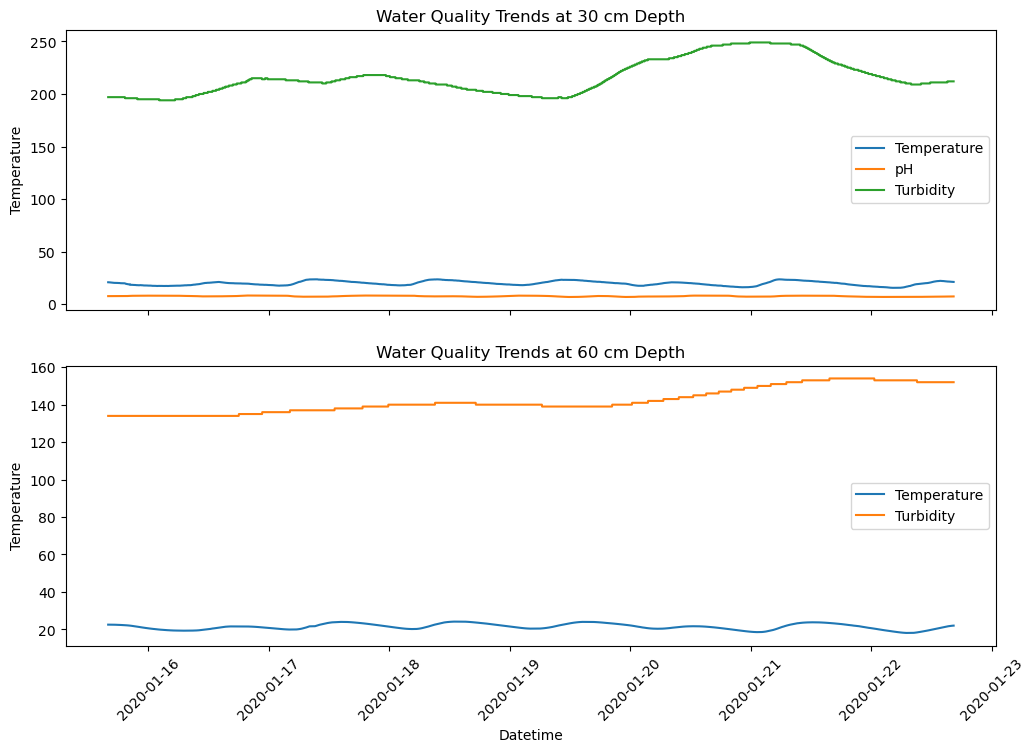

In [7]:
# Plot time series
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

sns.lineplot(data=data_30cm, x="Datetime", y="Temperature", label="Temperature", ax=axes[0])
sns.lineplot(data=data_30cm, x="Datetime", y="pH", label="pH", ax=axes[0])
sns.lineplot(data=data_30cm, x="Datetime", y="Turbidity", label="Turbidity", ax=axes[0])
axes[0].set_title("Water Quality Trends at 30 cm Depth")
axes[0].legend()

sns.lineplot(data=data_60cm, x="Datetime", y="Temperature", label="Temperature", ax=axes[1])
sns.lineplot(data=data_60cm, x="Datetime", y="Turbidity", label="Turbidity", ax=axes[1])
axes[1].set_title("Water Quality Trends at 60 cm Depth")
axes[1].legend()

plt.xticks(rotation=45)
plt.show()